In [34]:
import pandas as pd
import numpy as np
# import the functions for cosine distance, euclidean distance, and the correlation distance
from scipy.spatial.distance import cosine, euclidean, correlation

#### Import data from a text file (tab delimited)

In [35]:
df_data1 = pd.read_csv("D:\\_Download\\ml-100k\\ml-100k\\u.data", # the location to the data file
                       sep="\t", # for tab delimited documents, use "\t" as the seperator
                       names=["user", "item", "rating", "time" ] # define the names for the four columns
                       )
df_data1.__delitem__("time")
df_data1.head()

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


#### Examining the numbers of ratings, unique users, and unique items

In [36]:
# df_data1["user"].unique() returns the unique values in the "user" column
# the len function returns the length of a list-like object
print "Ratings: %d" % len(df_data1)
print "Unique users: %d" % len(df_data1["user"].unique())
print "Unique items: %d" % len(df_data1["item"].unique())

Ratings: 100000
Unique users: 943
Unique items: 1682


#### Rank items based on rating frequency

In [37]:
df_item_freq = df_data1.groupby("item").count()
df_item_freq.sort("rating", ascending=False).head()

,user,rating
item,,
50,583,583
258,509,509
100,508,508
181,507,507
294,485,485


#### See the ratings of a given user

In [38]:
df_data1[df_data1["user"]==700]

,user,item,rating
44156,700,181,5
45111,700,144,4
48649,700,96,4
54761,700,50,5
56278,700,79,3
57109,700,180,3
58231,700,168,3
68043,700,28,3
68705,700,222,3
70497,700,531,4


#### See the average rating of a item

In [39]:
# df_data1[df_data1["item"]==50] selects all row with item=50
# the mean() method calculates the mean (average) of the "rating" column of the selected rows
df_data1[df_data1["item"]==50]["rating"].mean()

4.3584905660377355

### Convert the user-item-rating list to a dense matrix

<p><b>Construct a pivot table in which the rows represent users and the columns represent items</b>
<li>the <font color=blue>values</font> argument specifies what values are to be aggregated in the pivot table</li>
<li>the <font color=blue>rows</font> argument specifies which column(s) in the original data frame is to be used as the row(s) in the pivot table</li>
<li>the <font color=blue>columns</font> argument specifies which column(s) in the original data frame is to be used as the column(s) in the pivot table</li>
<li>this pivot table is the same as a <i>dense matrix</i>, in which the elements are ratings. </li></p>
<p>In a dense matrix representation, each value is explicitly recorded. In a sparse matrix representation, only non-zero (or non-missing) values are recorded. If you have an enterprise scale dataset (e.g. all user-item ratings on Amazon), the dense matrix will not fit into memory. We will discuss possible alternatives in the lecture on Mining Big Data. Now we just learn to walk before we can run.</p>

In [81]:
dense_matrix = df_data1.pivot_table(values="rating", index=["user"], columns=["item"], aggfunc=np.sum)
print "Shape of the user-item matrix: %d x %d" % dense_matrix.shape
dense_matrix.head()

Shape of the user-item matrix: 943 x 1682


item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NaN stands for "Not a Number", which usually mean missing value.

The dense_matrix object is a Pandas data frame. The row indexes are user numbers (integer) and the column names are the item numbers (integer). <br>
User is not a column in this data frame, instead, it is the row index.

In [41]:
# return all ratings for Item 3
# access a column using the column name
dense_matrix[3]

user
1        4
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
...
929    NaN
930    NaN
931    NaN
932    NaN
933    NaN
934    NaN
935    NaN
936      4
937    NaN
938    NaN
939    NaN
940    NaN
941    NaN
942    NaN
943    NaN
Name: 3, Length: 943, dtype: float64

In [42]:
# return all ratings by User 2
# access a row using the row index
"""
This is not to be confused with DataFrame.iloc[].
loc locates a row using its index.
iloc locates a row using its position.
A row with an index of 1 maybe the 4th row of a data frame.
"""
dense_matrix.loc[2]

item
1        4
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10       2
11     NaN
12     NaN
13       4
14       4
15     NaN
...
1668   NaN
1669   NaN
1670   NaN
1671   NaN
1672   NaN
1673   NaN
1674   NaN
1675   NaN
1676   NaN
1677   NaN
1678   NaN
1679   NaN
1680   NaN
1681   NaN
1682   NaN
Name: 2, Length: 1682, dtype: float64

In [43]:
# retrieve the rating of User 2 on Item 1
# the first index is the column index (item)
# the second index is the row index (user)
dense_matrix[1][2]

4.0

In [44]:
# the mean rating of Item 2
dense_matrix[2].mean()

3.2061068702290076

In [45]:
# the iloc method returns a row from a data frame based on a row index
user1_ratings = dense_matrix.loc[1]
# the isnull() method of a pandas series checks each value to see if it is null (NaN)
user1_ratings.notnull()
# the following line selects values user1_ratings that are not null
user1_not_null = user1_ratings[user1_ratings.notnull()]
# print the number of item (non-missing ratings) rated by User 1
len(user1_not_null)

272

### Replace missing rating with 0s

Missing values (NaN) usually cannot be used in numerical calculations

In [126]:
dense_matrix = dense_matrix.fillna(0)
dense_matrix.head()

item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Examine the distribution of the number of ratings for each item

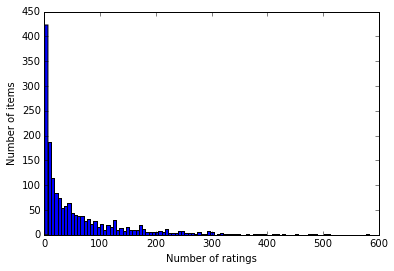

In [47]:
# count the non-zero elements for each column (item)
rating_counts_by_item = dense_matrix.apply(np.count_nonzero, axis=0)

# plot a histogram
import matplotlib.pyplot as plt
plt.hist(rating_counts_by_item.values, bins=100)
plt.ylabel("Number of items")
plt.xlabel("Number of ratings")
plt.show()

The histogram above shows a long-tail distribution:
<li>The majority of items were not rated by many users (the fisrt a few bins from the left)</li>
<li>Only a few most popular items have a large number of ratings (bins from the right)</li>

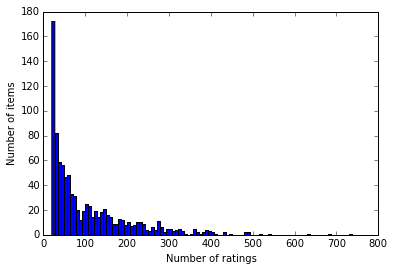

In [48]:
# count the non-zero elements for each row (user)
rating_counts_by_user = dense_matrix.apply(np.count_nonzero, axis=1)

# plot a histogram
import matplotlib.pyplot as plt
plt.hist(rating_counts_by_user.values, bins=100)
plt.ylabel("Number of items")
plt.xlabel("Number of ratings")
plt.show()

The histogram above shows a long-tail distribution:
<li>The majority of user only rated a few (the fisrt a few bins from the left)</li>
<li>Only a few user have rated a large number of items (bins from the right)</li>

### Calculating Similarity

<b>Correlation Distance</b> (i.e. 1 - Pearson Correlation, less distance = more similar)<br>
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation

In [49]:
# a user's correlation distance to itself (virtually 0)
correlation(dense_matrix.loc[1], dense_matrix.loc[1])

8.3044682241961709e-14

Correlation distance between Users 1 and 2

In [50]:
correlation(dense_matrix.loc[1], dense_matrix.loc[2])

0.89367807026442214

Correlation distance between Items 100 and 200

In [51]:
correlation(dense_matrix[100], dense_matrix[200])

0.73598407589418691

<b>Cosine Distance</b> <br>
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine
    

In [52]:
# a user's cosine distance to itself (virtually 0)
cosine(dense_matrix.loc[1], dense_matrix.loc[1])

-1.3322676295501878e-15

In [53]:
cosine(dense_matrix.loc[1], dense_matrix.loc[2])

0.83306901613129791

In [54]:
cosine(dense_matrix[1], dense_matrix[2])

0.5976178217003898

<b>Euclidean Distance</b><br>
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean

In [55]:
# a user's Euclidean distance to itself (0)
euclidean(dense_matrix.loc[1], dense_matrix.loc[1])

0.0

In [56]:
euclidean(dense_matrix.loc[1], dense_matrix.loc[2])

65.25335240430174

In [57]:
euclidean(dense_matrix[1], dense_matrix[2])

77.72387020729207

### Finding the K most similar items/user to a given item/user

#### Using Euclidean distance

In [58]:
# define a functions, which takes the given item number (integer) as the input and returns the top K similar items (in a data frame)
def top_k_items(item_number, k):
    # copy the dense matrix and transpose it so each row represents an item
    df_sim = dense_matrix.transpose()
    # remove the active item 
    df_sim = df_sim.loc[df_sim.index != item_number]
    # calculate the distance between the given item for each row (apply the function to each row if axis = 1)
    df_sim["distance"] = df_sim.apply(lambda x: euclidean(dense_matrix[item_number], x), axis=1)
    # return the top k from the sorted distances
    return df_sim.sort("distance").head(k)["distance"]   

In [59]:
# retrieve top five similar items to Item 1
top_k_items(1, 5)

item
121     63.529521
405     65.764732
117     65.840717
151     66.835619
118     67.535176
Name: distance, dtype: float64

In [60]:
def top_k_users(user_number, k):
    # no need to transpose the matrix this time because the rows already represent users
    # remove the active user
    df_sim = dense_matrix.loc[dense_matrix.index != user_number]
    # calculate the distance for between the given user and each row
    df_sim["distance"] = df_sim.apply(lambda x: euclidean(dense_matrix.loc[user_number], x), axis=1)
    # return the top k from the sorted distances
    return df_sim.sort("distance").head(k)["distance"] 

In [62]:
# retrieve top five similar users to User 3
top_k_users(3, 5)

user
317     20.952327
656     21.354157
335     21.424285
920     21.424285
155     21.840330
Name: distance, dtype: float64

#### K Nearest Neighbors Algorithm

In [63]:
from sklearn.neighbors import NearestNeighbors
# create an instance of the learner and specify it to use Euclidean distance
nbrs = NearestNeighbors(metric="euclidean")
# fit the learner using all user ratings except for User 3
nbrs.fit(dense_matrix.loc[dense_matrix.index != 3])
# the learner returns the distances and locations of the 5 nearest neighbors of User 3
distances, locs = nbrs.kneighbors(dense_matrix.loc[3], 5)
# retrieve these neighbors from the user-item matrix based on the locations
sim_users = dense_matrix.loc[dense_matrix.index != 3].iloc[locs.ravel()].index
# print the user indexes and the distances
for sim_user, dist in zip(sim_users, distances.ravel()):
    print sim_user, dist
# the ravel method is used to unpack list of lists

317 20.9523268398
656 21.3541565041
335 21.4242852856
920 21.4242852856
155 21.8403296678


### Partitioning the data for cross validation

70% of the users are used for training; 30% of the users are used for testing.

#### We will conduct cross validation to predict user ratings for Item 151

In [93]:
dense_matrix[151].value_counts()

4    108
3     85
5     81
2     40
1     12
dtype: int64

(943, 1681)
(943, 1)


### Partition for cross validation

In [128]:
from sklearn.cross_validation import train_test_split

# create a data frame for the predictors
df_x = dense_matrix[[col for col in dense_matrix.columns if col != 151]]
print df_x.shape

# create a series for the outcome
df_y = dense_matrix[[151]]
print df_y.shape


train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=0)
df_train_x = pd.DataFrame(train_x, columns=df_x.columns)
df_test_x = pd.DataFrame(test_x, columns=df_x.columns)
df_train_y = pd.DataFrame(train_y, columns=[151])
df_test_y = pd.DataFrame(test_y, columns=[151])
print "shapes"
print df_train_x.shape
print df_test_x.shape
print df_train_y.shape
print df_test_y.shape
print 
print "class counts"
print df_train_y[151].value_counts()
print df_test_y[151].value_counts()

(943, 1681)
(943, 1)
shapes
(660, 1681)
(283, 1681)
(660, 1)
(283, 1)

class counts
0    416
4     78
3     65
5     63
2     28
1     10
dtype: int64
0    201
4     30
3     20
5     18
2     12
1      2
dtype: int64


### Creat a function for user-based prediction<br><img height="100" width="120  "src="https://www.dropbox.com/s/cm3fizuony0upbd/user_formula.png?dl=1" align="left" >

In [156]:
# specify the number of similar users to retrieve
k = 5

def user_based_predict(user_number):
    # retrieve the top k similar users
    
    # copy from all the training predictors
    df_sim = df_train_x.copy()
    # for each user, calculate the distance between this user and the active user
    df_sim["distance"] = df_sim.apply(lambda x: euclidean(df_test_x.loc[user_number], x), axis=1)
    # create a new data frame to store the top k similar users
    df_sim_users = df_sim.loc[df_sim.sort("distance").head(k).index]
    
    # calculate these similar users' rating on 151, weighted by distance
    df_sim_users["weighed_d"] = map(lambda x: df_sim_users.loc[x]["distance"]*df_train_y.loc[x][151], df_sim_users.index)
    predicted = df_sim_users["weighed_d"].sum()/df_sim_users["distance"].sum()
    
    return predicted

#### Predict a single user

In [171]:
uid = df_test_x.index[5]
print "This user's rating on other items: ", df_test_x.loc[uid]
print
print "Predicted rating on Item 151:", user_based_predict(uid)
print "True rating on Item 151:     ", df_test_y.loc[uid][151]

This user's rating on other items:  item
1       3
2       0
3       0
4       0
5       0
6       0
7       4
8       0
9       0
10      0
11      4
12      0
13      0
14      0
15      3
...
1668    0
1669    0
1670    0
1671    0
1672    0
1673    0
1674    0
1675    0
1676    0
1677    0
1678    0
1679    0
1680    0
1681    0
1682    0
Name: 5, Length: 1681, dtype: float64

Predicted rating on Item 151: 1.00062093407
True rating on Item 151:      0.0


#### Predict all testing data

In [211]:
%%time
pred_151 = map(user_based_predict, df_test_x.index)
print "Number of ratings predicted: %d" % len(pred_151)

Number of ratings predicted: 283
Wall time: 27.1 s


#### Calculate prediction performance metrics

In [210]:
from sklearn.metrics import mean_absolute_error
print "Mean Absolute Error: ", mean_absolute_error(pred_151, df_test_y[151])

Mean Absolute Error:  0.946269649833
Wall time: 0 ns


You expect to make a error of 0.95 out of the 5-point rating scale. Not too bad. But not too accurate, either.

<b>What if we try a simple model-based approach?</b>
<p>
<li>The predictors are the user's rating on items other than 151</li>
<li>The outcome is the rating on 151</li>
<li>We train a linear regression model using the training predictors and outcome </li>
<li>We use this model to predict the user ratings on 151 in the testing set</li>
</p>

In [206]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train_x, train_y)
pred_y = linreg.predict(test_x)
print "Mean Absolute Error: ", mean_absolute_error(pred_y, test_y)

Mean Absolute Error:  1.99102801822


The MAE is twice as big as that of the item-based collaborative filtering <br>
This indicates that using only the most similar users for predict is helpful.<br>
Besides, linear regression is not robust to high-dimentional data.<br>
The number of the instances is much lower than the number of features, which leads to severe overfitting.

In [207]:
from sklearn.linear_model import Lasso
reg = Lasso()
reg.fit(train_x, train_y)
pred_y = reg.predict(test_x)
print "Mean Absolute Error: ", mean_absolute_error(pred_y, test_y)

Mean Absolute Error:  1.41947167243


Enforcing L1-norm regularization using LASSO has improved the results

In [208]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(train_x, train_y.ravel())
pred_y = reg.predict(test_x)
print "Mean Absolute Error: ", mean_absolute_error(pred_y, test_y)

Mean Absolute Error:  1.02557271524


Using support vector regression with a non-linear kernel further improved the results

In [209]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_x, train_y.ravel())
pred_y = reg.predict(test_x)
print "Mean Absolute Error: ", mean_absolute_error(pred_y, test_y)

Mean Absolute Error:  1.08021201413


Random forest regressor is also robutest to high-dimentional data

But the simple user-based collaborative filtering is still very competitive comparing these cutting edge machine learning models. <br> However, without more tests we cannot rely on this conclusion. At least a 10-fold cross validation need to be used.